In [1]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv

--2020-12-03 11:15:14--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘raw.githubusercontent.com’
--2020-12-03 11:15:15--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘raw.githubusercontent.com’


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib. pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np;
sns.set(style='whitegrid', context='notebook')

In [3]:
data = pd.read_csv('house_prices_train.csv')
test = pd.read_csv('house_prices_test.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/home/doc/env/lib/python3.7/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


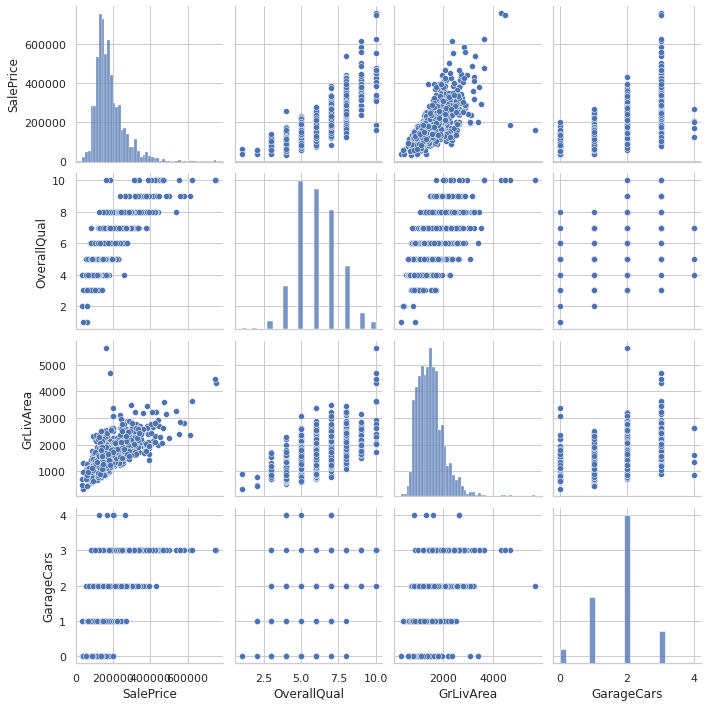

In [6]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(data[cols], size=2.5)
plt.show()

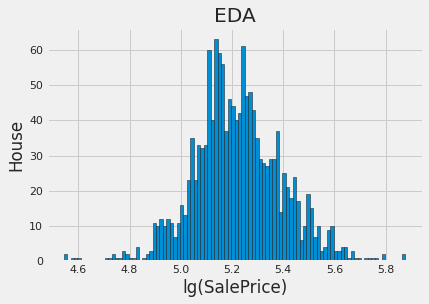

In [7]:
plt.style.use('fivethirtyeight')
plt.hist(np.log10(data[['SalePrice']].values), bins = 100, edgecolor = 'k');
plt.xlabel('lg(SalePrice)'); plt.ylabel('House');
plt.title('EDA');

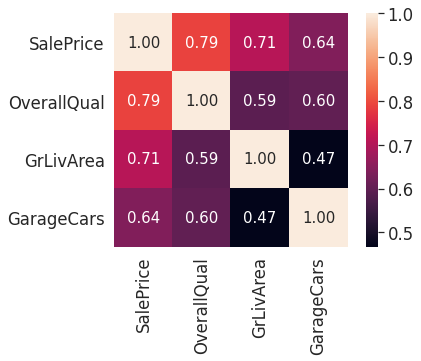

In [8]:
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [9]:
X = data[['GrLivArea', 'OverallQual']].values
y = data[['SalePrice']].values

In [10]:
sc_x = StandardScaler()
X_norm = sc_x.fit_transform(X)

In [11]:
slr = LinearRegression()
slr.fit(X_norm, np.log10(y))

LinearRegression()

In [12]:
sc_x_test = StandardScaler()
x_test_norm = sc_x_test.fit_transform(test[['GrLivArea', 'OverallQual']].values)

In [13]:
10 ** slr.predict(x_test_norm)

array([[117752.32700995],
       [157530.10059165],
       [143996.04917822],
       ...,
       [128845.85289375],
       [120168.61432879],
       [224972.60150851]])

In [14]:
slr.coef_, slr.intercept_

(array([[0.05786459, 0.10740225]]), array([5.22197896]))

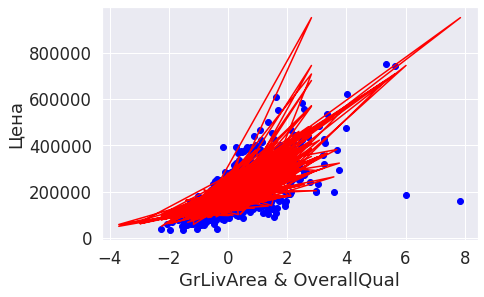

In [15]:
plt.scatter(np.array([[i[0]] for i in X_norm]), y, c='blue')
plt.plot(X_norm,  10 ** slr.predict(X_norm), color='red')
plt.xlabel('GrLivArea & OverallQual')
plt.ylabel('Цена')
plt.show()

In [16]:
def save(feature, result:pd.DataFrame, name:np.ndarray) -> None:
    output_multi = pd.DataFrame({'Id': feature.Id, 'SalePrice': result})
    output_multi.to_csv(f'{name}_submission.csv', index=False)
    print("=> Your submission was successfully saved! <=")

In [17]:
save(test, np.array([i[0] for i in 10 ** slr.predict(x_test_norm)]), '023test_regression')
#save(test_data, predictions_multi, 'Multi_regression')

=> Your submission was successfully saved! <=
